In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def rho_green_light(x, rho_light):
    rho = numpy.zeros_like(x)
    mask = numpy.where(x<2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [4]:
#parameters
nx = 81 #number of locations on the road
L = 4.0 #length of the road
dx = L / (nx - 1) # distance between locations
nt = 30 #number of time steps
u_max = 1.0 #max velcity
rho_max = 10.0 #max car density
rho_light = 10.0 #density at the location of the red light

#discretize the road
x = numpy.linspace(0.0, L, num = nx)

#compute the initial traffic density
rho0 = rho_green_light(x, rho_light)

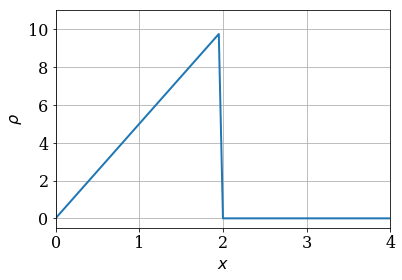

In [5]:
# Plot the initial car density on the road.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);

In [6]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [32]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        #compute flux
        F = flux(rho, *args)
        #advance in time
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        #set the left boundary condition
        rho[0] = bc_value
        #record the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [33]:
#set the time-step size based on the CFL limit
sigma = 1.0
dt = sigma *dx / u_max #time-step size

In [37]:
#compute the density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)
#print(rho_hist[1])

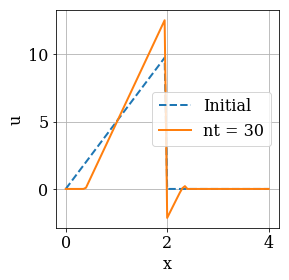

In [39]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, rho0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, rho_hist[8], label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()

In [50]:
def update_plot(nt):
    fig = pyplot.figure(figsize = (6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$/rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist[nt],
                       color = 'C0', linestyle = '-', linewidth = 2)[0]
    pyplot.xlim(0.0,L)
    pyplot.ylim(-0.5,11.0)
    fig.tight_layout()
    fig.suptitle('Time step {:0>2}'.format(nt))

In [52]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='time step')

w = ipywidgets.interactive(update_plot, nt=nt_slider)
display(w)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

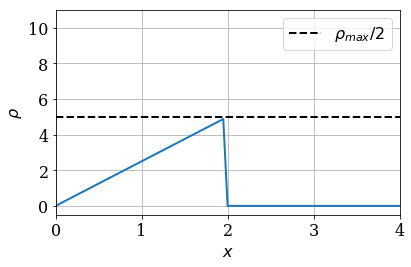

In [40]:
#change parameters so the wave only tavels in one direction
nt = 40
rho_light = 5.0

#inital traffic density
rho0 = rho_green_light(x, rho_light)

# Plot the initial traffic density.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.hlines(rho_max / 2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0)
fig.tight_layout()

In [41]:
#compute density at all time-steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

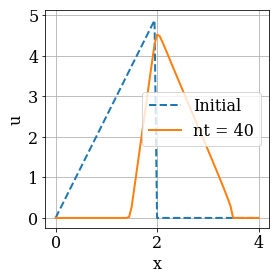

In [46]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, rho0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, rho_hist[30], label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()

In [47]:
#change parameters again!
rho_light = 4.0
u_max = 1.1

#compute the intial traffic density
rho0 = rho_green_light(x, rho_light)

#compute the traffic density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

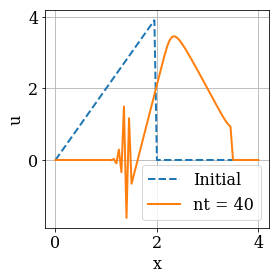

In [48]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, rho0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, rho_hist[30], label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()